In [1]:
# loading libraries and reading the data
import numpy as np
import pandas as pd

companies  = pd.read_csv("./companies.csv", encoding='iso-8859-1')
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')
rounds2 = pd.read_csv("./rounds2.csv", encoding='iso-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')

In [2]:
companies.head(100)
companies['permalink'] = companies['permalink'].astype('str').str.upper()

In [3]:
len(companies.permalink.unique())

66368

In [4]:
companies.shape

(66368, 10)

In [5]:
rounds2['company_permalink'] = rounds2['company_permalink'].astype('str').str.upper()

In [6]:
len(rounds2.company_permalink.unique())

66368

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.shape

(114949, 6)

In [9]:
#rounds2.merge(companies, how='inner', left_on='company_permalink', right_on='permalink')
rounds2.shape

(114949, 6)

In [10]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame.shape

(114949, 16)

In [11]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [12]:
rounds2.company_permalink.isin(companies['permalink']).value_counts()

True    114949
Name: company_permalink, dtype: int64

In [13]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [14]:
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [15]:
master_frame.drop(columns=['permalink','funding_round_code'], axis=1, inplace=True)

In [16]:
master_frame.shape

(114949, 14)

In [17]:
master_frame.status.value_counts()

operating    90153
acquired     11745
closed        8725
ipo           4326
Name: status, dtype: int64

In [18]:
# getting rid of entries for companies having status as closed. No point of having those in the analysis
master_frame = master_frame[(master_frame.status != 'closed')]
master_frame.shape

(106224, 14)

In [19]:
# As we are not requiring some of the columns for our analysis we can safely drop them
master_frame.drop(columns=['founded_at', 'funding_round_permalink', 'homepage_url','state_code','region','city'], axis=1, inplace=True)
master_frame.shape

(106224, 8)

In [20]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     18321
name                      0
category_list          2385
status                    0
country_code           6831
dtype: int64

In [21]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
funded_at              0.00
raised_amount_usd     17.25
name                   0.00
category_list          2.25
status                 0.00
country_code           6.43
dtype: float64

In [22]:
# Here we want to get rid of the entries which do not have country code. We cannnot involve those entries 
# in our analysis and need to removed now itself before we do country analysis as they should not contribute in our calcution
# of our central tendendancy of any variable. Hence removing as part of data cleaning.
master_frame = master_frame[(~master_frame.country_code.isnull())]
master_frame.shape

(99393, 8)

In [23]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     16116
name                      0
category_list          1413
status                    0
country_code              0
dtype: int64

In [24]:
master_frame.reset_index(inplace = True, drop=True)
master_frame.tail()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
99388,/ORGANIZATION/ZZZZAPP-COM,seed,01-11-2011,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99389,/ORGANIZATION/ZZZZAPP-COM,seed,01-08-2013,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99390,/ORGANIZATION/ZZZZAPP-COM,convertible_note,01-03-2014,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99391,/ORGANIZATION/ZZZZAPP-COM,seed,01-05-2013,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99392,/ORGANIZATION/ASYS-2,seed,01-01-2015,18192.0,Ãasys,Consumer Electronics|Internet of Things|Teleco...,operating,USA


#### Now we see around 17% missing values of raised_amount_usd column. Analysis for imputing these values

In [25]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
#import the necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
master_by_fund_type = master_frame.groupby(['funding_round_type'])

In [27]:
master_frame[(master_frame.raised_amount_usd.isnull())].head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,NaN,004 Technologies,Software,operating,USA
13,/ORGANIZATION/1,undisclosed,05-02-2013,NaN,One Inc.,Mobile,operating,USA
16,/ORGANIZATION/1-4-ALL,equity_crowdfunding,21-04-2013,NaN,1-4 All,Entertainment|Games|Software,operating,USA
17,/ORGANIZATION/1-618-TECHNOLOGY,equity_crowdfunding,22-01-2014,NaN,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA


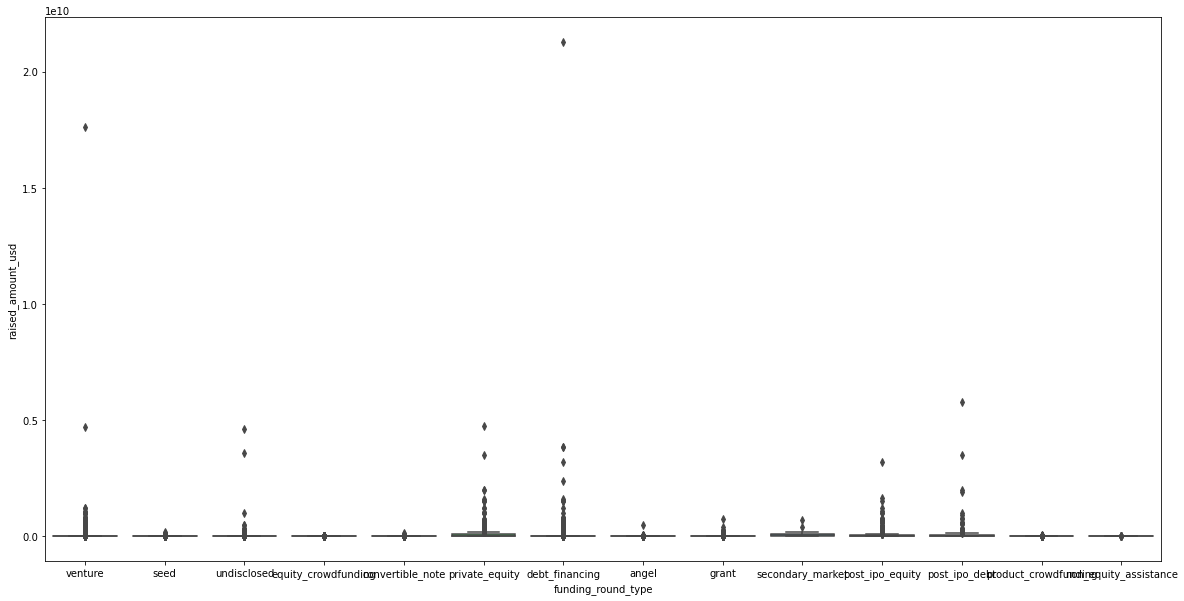

In [28]:
plt.figure(figsize=[20,10])
sns.boxplot(master_frame['funding_round_type'], master_frame.raised_amount_usd)
plt.show()

From the box plots for different funding type it can be seen that there are many outliers, due to which for imputing the 
missing raised_amount_usd we cannot use the mean value as it may deviate the analysis. Hence we have to consider median values for imputing.

In [29]:
# median value of raised_amount_usd which is around 1 million
master_frame.raised_amount_usd.median()

1842555.0

In [30]:
master_by_fund_type.raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,3982.0,9.947552e+05,8.097381e+06,0.0,157504.00,415000.0,1.000000e+06,4.945120e+08
convertible_note,1275.0,1.340013e+06,6.085538e+06,0.0,82013.00,300000.0,1.000000e+06,1.500000e+08
debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4.000000e+06,2.127194e+10
equity_crowdfunding,1126.0,5.112600e+05,1.756837e+06,0.0,5000.00,80074.0,3.383222e+05,2.740000e+07
grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2.000000e+06,7.500000e+08
non_equity_assistance,59.0,4.605890e+05,1.959476e+06,0.0,27000.00,60000.0,1.927670e+05,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,6.000000e+07,5.800000e+09
post_ipo_equity,547.0,6.709361e+07,2.136634e+08,77.0,3745981.00,12000000.0,3.938415e+07,3.200000e+09
private_equity,1731.0,7.579720e+07,2.061303e+08,0.0,5400000.00,21000000.0,7.699983e+07,4.745460e+09


In [31]:
master_frame.raised_amount_usd.isnull().groupby(master_frame['funding_round_type']).sum()

funding_round_type
angel                     937
convertible_note          314
debt_financing            198
equity_crowdfunding      1975
grant                      60
non_equity_assistance      80
post_ipo_debt               0
post_ipo_equity             9
private_equity            260
product_crowdfunding       21
secondary_market           60
seed                     5166
undisclosed              2791
venture                  4245
Name: raised_amount_usd, dtype: int64

The above two cells show the median values with respect to the different funding_type. Medians are varying depending on the funding type. Imputing column median in all the missing cells of irrespective of funding_type will not be useful mainly for funding_types like seed, non_equity_assistance (which have lower range of fund raised). Also in the above cells we see the count of missing values is substantial for funding_types like seed and venture. So imputing these missing values with less accurate values might make it unrealistic. Instead we can impute the missing values with its category median, which will be more realistic and will not give wrong results.

In [32]:
master_frame.raised_amount_usd = master_frame.groupby(['funding_round_type']).raised_amount_usd.transform(lambda x: x.fillna(x.median()))

In [33]:
master_frame.isnull().sum()

company_permalink        0
funding_round_type       0
funded_at                0
raised_amount_usd        0
name                     0
category_list         1413
status                   0
country_code             0
dtype: int64

In [34]:
master_frame.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/ORGANIZATION/-QOUNTER,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/0-6-COM,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA


In [35]:
master_frame.groupby(['funding_round_type']).raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4919.0,8.843200e+05,7.288840e+06,0.0,200000.00,415000.0,775000.00,4.945120e+08
convertible_note,1589.0,1.134498e+06,5.466496e+06,0.0,104501.00,300000.0,750000.00,1.500000e+08
debt_financing,6324.0,1.736530e+07,2.879926e+08,0.0,362026.25,1100000.0,3716736.00,2.127194e+10
equity_crowdfunding,3101.0,2.366414e+05,1.078472e+06,0.0,80074.00,80074.0,80074.00,2.740000e+07
grant,1922.0,4.160181e+06,2.473779e+07,0.0,65164.75,250000.0,1777687.75,7.500000e+08
non_equity_assistance,139.0,2.300342e+05,1.285772e+06,0.0,60000.00,60000.0,60000.00,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,60000000.00,5.800000e+09
post_ipo_equity,556.0,6.620181e+07,2.120381e+08,77.0,3871566.00,12000000.0,38130307.75,3.200000e+09
private_equity,1991.0,6.864136e+07,1.930786e+08,0.0,6700000.00,21000000.0,66000000.00,4.745460e+09


In [36]:
master_frame.country_code.value_counts()

USA    67609
GBR     5595
CAN     2893
CHN     2613
IND     2148
       ...  
JEY        1
GGY        1
TGO        1
PRY        1
DMA        1
Name: country_code, Length: 134, dtype: int64

In [37]:
master_frame_venture = master_frame[(master_frame.funding_round_type == 'venture')]

In [38]:
master_frame_venture.shape

(49194, 8)

In [39]:
master_frame_venture.funding_round_type.value_counts()

venture    49194
Name: funding_round_type, dtype: int64

In [40]:
master_frame_venture.dtypes

company_permalink      object
funding_round_type     object
funded_at              object
raised_amount_usd     float64
name                   object
category_list          object
status                 object
country_code           object
dtype: object

In [41]:
master_frame_venture.country_code.value_counts()

USA    35829
GBR     2133
CHN     2034
CAN     1239
IND      961
       ...  
UGA        1
PRI        1
GGY        1
SAU        1
PSE        1
Name: country_code, Length: 102, dtype: int64

In [42]:
english_spk_countries = pd.read_csv("./EnglishSpCntrs.csv") 
english_spk_countries.head()

,EngSpeaking
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [43]:
master_frame_venture['IsEngSpeaking'] = master_frame_venture['country_code'].apply(
    lambda x: np.isin(x,english_spk_countries.EngSpeaking))

In [44]:
master_frame_venture.shape

(49194, 9)

In [45]:
master_frame_venture.sample(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking
55575,/ORGANIZATION/MOTOBUYKERS,venture,07-10-2012,650100.0,Motobuykers,E-Commerce|Fashion|Internet,operating,ESP,False
18526,/ORGANIZATION/CLOUDWORDS,venture,18-05-2012,2400000.0,Cloudwords,Content|Enterprise Software|SaaS|Translation,operating,USA,True
454,/ORGANIZATION/3PLAY-MEDIA,venture,21-06-2011,511601.0,3Play Media,Software,operating,USA,True
45341,/ORGANIZATION/KATANGO,venture,21-10-2010,5000000.0,Katango,Networking|Social Media|Social Search,acquired,USA,True
34455,/ORGANIZATION/GID-GROUP,venture,20-05-2010,2499936.0,GID Group,Biotechnology,operating,USA,True
80118,/ORGANIZATION/SONAVATION,venture,21-05-2014,20411778.0,Sonavation,Hardware + Software,operating,USA,True
31693,/ORGANIZATION/FLITTO,venture,24-08-2012,705903.0,Flitto,Android|Crowdsourcing|iOS|Translation,operating,KOR,False
62433,/ORGANIZATION/OUTREACH,venture,27-10-2015,9200000.0,Outreach,Application Platforms|SaaS|Sales and Marketing,operating,USA,True
16869,/ORGANIZATION/CHINA-INTELLIGENT-TRANSPORT-SYST...,venture,01-02-2010,43500000.0,China Intelligent Transport System Group,Public Transportation,ipo,CHN,False
9688,/ORGANIZATION/BEIJING-TRANSINFO-TECHNOLOGY-GRO...,venture,01-07-2011,1623640.0,Transinfo Group,Public Transportation,operating,CHN,False


In [46]:
master_frame_venture_EngSpeaking = master_frame_venture[(master_frame_venture.IsEngSpeaking == True)]

In [47]:
master_frame_venture_EngSpeaking.shape

(41059, 9)

In [48]:
topEngSpCountries = master_frame_venture_EngSpeaking.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending = False)
topEngSpCountries.head(9)

country_code
USA    4.103551e+11
GBR    1.938634e+10
IND    1.487060e+10
CAN    9.255487e+09
SGP    3.059136e+09
IRL    1.900739e+09
AUS    1.327745e+09
NZL    4.288804e+08
ZAF    2.982131e+08
Name: raised_amount_usd, dtype: float64

In [49]:
top9 = pd.DataFrame(topEngSpCountries.head(9))

In [50]:
top9.head(10)

,raised_amount_usd
country_code,
USA,4.103551e+11
GBR,1.938634e+10
IND,1.487060e+10
CAN,9.255487e+09
SGP,3.059136e+09
IRL,1.900739e+09
AUS,1.327745e+09
NZL,4.288804e+08
ZAF,2.982131e+08


In [51]:
master_frame_venture_EngSpeaking.category_list = master_frame_venture_EngSpeaking.category_list.astype('str')

In [52]:
master_frame_venture_EngSpeaking['Primary_category'] = master_frame_venture_EngSpeaking['category_list'].apply(
    lambda x : x.split('|', maxsplit=1)[0])

In [53]:
master_frame_venture_EngSpeaking.Primary_category = master_frame_venture_EngSpeaking.Primary_category.astype('str').str.lower()
master_frame_venture_EngSpeaking.head(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,True,media
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,True,application platforms
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA,True,software
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,True,biotechnology
9,/ORGANIZATION/0XDATA,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,True,analytics
10,/ORGANIZATION/0XDATA,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,True,analytics
11,/ORGANIZATION/0XDATA,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,True,analytics
21,/ORGANIZATION/1-MAINSTREAM,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,True,apps
27,/ORGANIZATION/10-MINUTES-WITH,venture,09-10-2014,4000000.0,10 Minutes With,Education,operating,GBR,True,education
31,/ORGANIZATION/1000LOOKZ,venture,22-07-2013,5000000.0,1000Lookz,Beauty,operating,IND,True,beauty


In [54]:
master_frame_venture_EngSpeaking.isnull().sum()

company_permalink     0
funding_round_type    0
funded_at             0
raised_amount_usd     0
name                  0
category_list         0
status                0
country_code          0
IsEngSpeaking         0
Primary_category      0
dtype: int64

In [55]:
master_frame_venture_EngSpeaking.shape

(41059, 10)

In [56]:
import chardet
with open("./mapping.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [57]:
mapping  = pd.read_csv("./mapping.csv", encoding='ascii')

In [58]:
mapping.category_list = mapping.category_list.astype('str').str.lower()
mapping.category_list = mapping['category_list'].apply(lambda x : x.replace('0','na'))

In [59]:
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns, value_vars))
print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [60]:
# convert into long
long_mapping_df = pd.melt(mapping, 
        id_vars = id_vars, 
        value_vars = value_vars)
long_mapping_df.head()

,category_list,variable,value
0,nan,Automotive & Sports,0
1,3d,Automotive & Sports,0
2,3d printing,Automotive & Sports,0
3,3d technology,Automotive & Sports,0
4,accounting,Automotive & Sports,0


In [61]:
# remove rows having value=0
long_mapping_df = long_mapping_df[long_mapping_df['value']==1]
long_mapping_df = long_mapping_df.drop('value', axis=1)

long_mapping_df.rename(columns = {'category_list': 'category', 'variable':'Main_Sector'}, inplace=True)
long_mapping_df.category[(long_mapping_df.category == 'Nanotechnology')]

Series([], Name: category, dtype: object)

In [62]:
master_frame_venture_EngSpeaking_Sector = pd.merge(master_frame_venture_EngSpeaking, long_mapping_df, how='left', left_on='Primary_category', right_on='category')
master_frame_venture_EngSpeaking_Sector = master_frame_venture_EngSpeaking_Sector.drop('category', axis=1)
master_frame_venture_EngSpeaking_Sector.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,True,media,Entertainment
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,True,application platforms,"News, Search and Messaging"
2,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA,True,software,Others
3,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,True,biotechnology,Cleantech / Semiconductors
4,/ORGANIZATION/0XDATA,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,True,analytics,"Social, Finance, Analytics, Advertising"


In [63]:
master_frame_venture_EngSpeaking_Sector.shape

(41059, 11)

In [64]:
#master_frame_checked_USA = master_frame_venture_EngSpeaking_Sector[
 #   (master_frame_venture_EngSpeaking_Sector.country_code == "USA")]

In [65]:
master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.Main_Sector.isnull())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
3229,/ORGANIZATION/ASIA-TRANSLATE,venture,01-09-2009,20000.0,Asia Translate,English-Speaking|Translation,operating,SGP,True,english-speaking,NaN
7709,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,venture,26-02-2010,125000.0,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,True,natural gas uses,NaN
8679,/ORGANIZATION/CONSENSUS-POINT,venture,19-04-2011,788374.0,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,True,enterprise 2.0,NaN
8680,/ORGANIZATION/CONSENSUS-POINT,venture,18-07-2012,2600000.0,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,True,enterprise 2.0,NaN
10691,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,venture,07-04-2015,250000.0,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,True,adaptive equipment,NaN
13281,/ORGANIZATION/FIVE-BELOW,venture,14-10-2010,194000000.0,Five Below,Specialty Retail,ipo,USA,True,specialty retail,NaN
13368,/ORGANIZATION/FLEXPORT,venture,06-08-2015,20000000.0,Flexport,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,True,enterprise 2.0,NaN
15749,/ORGANIZATION/HEALTHTELL,venture,13-06-2014,9486929.0,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,True,biotechnology and semiconductor,NaN
18864,/ORGANIZATION/JUSTINMIND,venture,17-12-2007,862000.0,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,True,rapidly expanding,NaN
25468,/ORGANIZATION/ONSPRING-TECHNOLOGIES,venture,01-01-2015,2000000.0,Onspring Technologies,Enterprise 2.0|Enterprise Software|Software,operating,USA,True,enterprise 2.0,NaN


In [66]:
round(100*(master_frame_venture_EngSpeaking_Sector.isnull().sum()/len(master_frame_venture_EngSpeaking_Sector.index)),2)

company_permalink     0.00
funding_round_type    0.00
funded_at             0.00
raised_amount_usd     0.00
name                  0.00
category_list         0.00
status                0.00
country_code          0.00
IsEngSpeaking         0.00
Primary_category      0.00
Main_Sector           0.03
dtype: float64

In [67]:
# We see there are 0.03% of Sector column entries which are are missing. This is very less amount and can safely be ignored.
# But we also see out of 12 entries 11 are for country USA. From the analysis done till now, USA is one of the desired country
# hence we think twice before just getting rid for these rows with missing Sector. Hence we can decide on filling in mode value 
# for this variable for country USA.

In [68]:
#master_frame_venture_EngSpeaking_Sector['Main_Sector'] = master_frame_venture_EngSpeaking_Sector['Main_Sector'].fillna(
    #master_frame_venture_EngSpeaking_Sector[master_frame_venture_EngSpeaking_Sector.country_code == 'USA'].Main_Sector.mode, inplace=True)
#master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.Main_Sector.isnull())]

In [69]:
master_frame_venture_EngSpeaking_Sector.isnull().sum()

company_permalink      0
funding_round_type     0
funded_at              0
raised_amount_usd      0
name                   0
category_list          0
status                 0
country_code           0
IsEngSpeaking          0
Primary_category       0
Main_Sector           12
dtype: int64

In [70]:
master_frame_venture_EngSpeaking_Sector['Main_Sector'] = master_frame_venture_EngSpeaking_Sector['Main_Sector'].fillna(
    master_frame_venture_EngSpeaking_Sector[master_frame_venture_EngSpeaking_Sector.country_code == 'USA'].Main_Sector.mode()[0])

In [71]:
master_frame_venture_EngSpeaking_Sector.isnull().sum()

company_permalink     0
funding_round_type    0
funded_at             0
raised_amount_usd     0
name                  0
category_list         0
status                0
country_code          0
IsEngSpeaking         0
Primary_category      0
Main_Sector           0
dtype: int64

Now, we have 'master_frame_venture_EngSpeaking_Sector' dataframe with only english speaking countries, venture as investment type and having main Sector column according to the primary category from the category list of each company

In [72]:
master_frame_venture_EngSpeaking_Sector.head()
master_frame_venture_EngSpeaking_Sector.shape

(41059, 11)

In [73]:
# Extracting the dataframe for country USA for venture funding type from master_frame_venture_EngSpeaking_Sector
D1_venture_USA = master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.country_code == 'USA')]
D1_venture_USA.shape

(35829, 11)

In [80]:
# For finding the total number of investments in USA we need to get rid of observations for which raised_amount_usd is 0.0 as 
# that cannot be considered as investment in that company
D1_venture_USA[(D1_venture_USA.raised_amount_usd != 0.0)].shape


(35809, 11)

In [82]:
# For finding the total amount of investment in USA we need to just compute the total of raised_amount_usd variable
D1_venture_USA.raised_amount_usd.sum()

410355149987.0

In [100]:
D1_vec_USA_SectorGrp = D1_venture_USA[(D1_venture_USA.raised_amount_usd != 0.0)].groupby(['Main_Sector'])

In [101]:
D1_vec_USA_SectorGrp.company_permalink.count().sort_values(ascending = False)

Main_Sector
Others                                     8200
Cleantech / Semiconductors                 7767
Social, Finance, Analytics, Advertising    7413
News, Search and Messaging                 4234
Health                                     3213
Manufacturing                              2472
Entertainment                              1734
Automotive & Sports                         536
Blanks                                      240
Name: company_permalink, dtype: int64

In [102]:
D1_ven_USA_Others = D1_venture_USA[(D1_venture_USA.Main_Sector == 'Others')]
D1_ven_USA_Others[(D1_ven_USA_Others.raised_amount_usd == D1_ven_USA_Others.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
33058,/ORGANIZATION/SOCIAL-FINANCE,venture,30-09-2015,1.000000e+09,SoFi,Education|Finance|Financial Services|Peer-to-Peer,operating,USA,True,education,Others


In [105]:
D1_ven_USA_ClSemi = D1_venture_USA[(D1_venture_USA.Main_Sector == 'Cleantech / Semiconductors')]
D1_ven_USA_ClSemi[(D1_ven_USA_ClSemi.raised_amount_usd == D1_ven_USA_ClSemi.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
13789,/ORGANIZATION/FREESCALE,venture,21-10-2006,1.760000e+10,Freescale Semiconductor,Semiconductors,ipo,USA,True,semiconductors,Cleantech / Semiconductors


In [74]:
# Extracting the dataframe for country GBR for venture funding type from master_frame_venture_EngSpeaking_Sector
D2_venture_GBR = master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.country_code == 'GBR')]
D2_venture_GBR.shape

(2133, 11)

In [106]:
# For finding the total number of investments in GBR we need to get rid of observations for which raised_amount_usd is 0.0 as 
# that cannot be considered as investment in that company
D2_venture_GBR[(D2_venture_GBR.raised_amount_usd != 0.0)].shape

(2132, 11)

In [109]:
D2_venture_GBR.raised_amount_usd.sum()

19386343570.0

In [110]:
D2_ven_GBR_SectorGrp = D2_venture_GBR[(D2_venture_GBR.raised_amount_usd != 0.0)].groupby(['Main_Sector'])

In [111]:
D2_ven_GBR_SectorGrp.company_permalink.count().sort_values(ascending = False)

Main_Sector
Others                                     544
Social, Finance, Analytics, Advertising    449
Cleantech / Semiconductors                 428
News, Search and Messaging                 244
Entertainment                              146
Manufacturing                              125
Health                                     119
Automotive & Sports                         48
Blanks                                      29
Name: company_permalink, dtype: int64

In [112]:
D2_ven_GBR_Others = D2_venture_GBR[(D2_venture_GBR.Main_Sector == 'Others')]
D2_ven_GBR_Others[(D2_ven_GBR_Others.raised_amount_usd == D2_ven_GBR_Others.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
25425,/ORGANIZATION/ONEWEB,venture,26-06-2015,500000000.0,OneWeb,Technology,operating,GBR,True,technology,Others


In [113]:
D2_ven_GBR_SFAA = D2_venture_GBR[(D2_venture_GBR.Main_Sector == 'Social, Finance, Analytics, Advertising')]
D2_ven_GBR_SFAA[(D2_ven_GBR_SFAA.raised_amount_usd == D2_ven_GBR_SFAA.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
21905,/ORGANIZATION/MEREO,venture,29-07-2015,119000000.0,Mereo,Consulting,operating,GBR,True,consulting,"Social, Finance, Analytics, Advertising"


In [115]:
# Extracting the dataframe for country USA for venture funding type from master_frame_venture_EngSpeaking_Sector
D3_venture_IND = master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.country_code == 'IND')]
D3_venture_IND.shape

(961, 11)

In [116]:
# For finding the total number of investments in GBR we need to get rid of observations for which raised_amount_usd is 0.0 as 
# that cannot be considered as investment in that company
D3_venture_IND[(D3_venture_IND.raised_amount_usd != 0.0)].shape

(960, 11)

In [117]:
D3_venture_IND.raised_amount_usd.sum()

14870603718.0

In [118]:
D3_ven_IND_SectorGrp = D3_venture_IND[(D3_venture_IND.raised_amount_usd != 0.0)].groupby(['Main_Sector'])

In [119]:
D3_ven_IND_SectorGrp.company_permalink.count().sort_values(ascending = False)

Main_Sector
Others                                     320
Social, Finance, Analytics, Advertising    183
News, Search and Messaging                 148
Entertainment                               88
Manufacturing                               64
Cleantech / Semiconductors                  62
Health                                      55
Automotive & Sports                         32
Blanks                                       8
Name: company_permalink, dtype: int64

In [120]:
D3_ven_IND_Others = D3_venture_IND[(D3_venture_IND.Main_Sector == 'Others')]
D3_ven_IND_Others[(D3_ven_IND_Others.raised_amount_usd == D3_ven_IND_Others.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
13399,/ORGANIZATION/FLIPKART,venture,29-07-2014,1.000000e+09,Flipkart,E-Commerce|Online Shopping,operating,IND,True,e-commerce,Others


In [121]:
D3_ven_IND_SFAA = D3_venture_IND[(D3_venture_IND.Main_Sector == 'Social, Finance, Analytics, Advertising')]
D3_ven_IND_SFAA[(D3_ven_IND_SFAA.raised_amount_usd == D3_ven_IND_SFAA.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
32108,/ORGANIZATION/SHOPCLUES-COM,venture,19-01-2015,100000000.0,ShopClues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,True,consumer internet,"Social, Finance, Analytics, Advertising"
